In [3]:
import pandas as pd
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [5]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [6]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [7]:
file = '../DATA/공공보건의료기관현황.csv'

#### 공공보건의료기관 현황 분석 <hr>

- 데이터 준비 및 탐색

In [8]:
data = pd.read_csv(file, index_col = 0, encoding = 'utf-8-sig')
print(data.columns)
data.head()

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


- ['주소'] 컬럼 정보 확인

In [9]:
data['주소'].head()

연번
1        강원도 춘천시 충열로 142번길 24-16
2               강원도 삼척시 오십천로 418
3            강원도 영월군 영월읍 중앙1로 59
4          강원도 원주시 서원대로 387(개운동)
5    강원도 강릉시 경강로 2007(남문동 164-1)
Name: 주소, dtype: object

- 주소에서 '시도', '군구' 정보 분리

In [10]:
addr = pd.DataFrame(data['주소'])
addr = addr['주소'].apply(lambda v : v.split()[:2])  # 시도, 군구 분리(공백기준)
# addr.to_list()
addr = pd.DataFrame(addr.tolist(), columns = ('시도', '군구'))
addr.head()


,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


- ['시도'] 컬럼에서 고유한 값 찾기

In [11]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

- '창원시' 주소 데이터 변경
    - 표준 행정 구역 이름으로 수정 : '창원시' ==> '경상남도 창원시'

In [12]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [13]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

- 변경된 내용 확인

In [14]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [15]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

- 동일하게 '경산시', 천안시 주소 데이터 변경

In [16]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [17]:
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [18]:
addr[addr['시도'] == '천안시']
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']    

- '시도' 변경 내용 확인

In [19]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

- 시도 이름을 표준 행정구역 이름으로 변경
    - '경기' -> '경기도', '경남' ==> '경상남도' 등

In [20]:
# 표준 행정구역 이름으로 수정 : 경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기' : '경기도', '경남' : '경상남도', '경북' : '경상북도', '충북' : '충청북도', '서울시' : '서울특별시', '부산특별시' : '부산광역시' , '대전시' : '대전광역시', '충남' : '충청남도', '전남' : '전라남도', '전북': '전라북도'}

# dict.get(key[, default])
# - key에 해당하는 값이 없으면 default값(key)을 리턴
addr['시도'] = addr['시도'].apply(lambda v : addr_aliases.get(v, v))

In [21]:
print(addr['시도'].unique())

['강원도' '경기도' '경상남도' '경상북도' '인천광역시' '대구광역시' '전라남도' '대전광역시' '광주광역시'
 '제주특별자치도' '부산광역시' '전라북도' '충청북도' '서울특별시' '충청남도' '울산광역시']


- '군구' 컬럼 내용 확인

In [22]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

- 잘못된 군구 이름 수정
    - '아란13길' 데이터 변경
    - '아란13길'을 '제주특별자치도', '제주시'로 수정

In [23]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [24]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [25]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

- 행정구역별 공공보건의료기관의 수 구하기
    - '시도'와 '군구' 컬럼을 합친 새로운 컬럼 (['시도군구']) 추가
    - ['의료기관수'] 컬럼 추가 : 의료기관 수 합계를 저장할 컬럼 생성

In [26]:
addr['시도군구'] = addr.apply(lambda r : r['시도'] + ' ' + r['군구'], axis = 1)

In [27]:
addr['의료기관수'] = 0
addr.head()

,시도,군구,시도군구,의료기관수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


- 행정구역별 공공보건으료기관의 수 구하기
    - ['시도'], ['군구'], ['시도군구']를 기준으로 그룹 생성 후 그룹별 의료 기관수 합계 구하기

In [28]:
# as_index -> 그룹화할 내용을 인덱스로 사용할지 여부, False : 기존 인덱스가 유지됨
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,의료기관수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


- 행정구역별 공공보건의료기관의 수 구하기
    - ['시도군구'] 컬럼을 데이터프레임 병합에 사용할 인덱스로 설정

In [29]:
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,의료기관수
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [30]:
file = '../DATA/행정구역시군구별성별인구수.xlsx'

#### 행정구역(시군구)별 성별 인구수 다운로드 <hr>

- 행정구역별 인구 데이터 준비

In [31]:
population = pd.read_excel(file, sheet_name = '데이터', header = [0])
population.head()

,행정구역(시도)별1,행정구역(시군구)별2,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


- 행정구역별 인구 데이터 수정
    - 행정구역별 데이터에서 병합에 사용할 공통 컬럼 추가
        - ['군구'] 컬럼에서 공백 제거 : 앞, 뒤 공백이 존재함
        - ['시도']와 ['군구'] 연결하여 ['시도군구'] 컬럼 추가
        - ['군구'] 컬럼에서 '소계' 항목 제거
        - ['시도군구] 컬럼을 병합에 사용할 인덱스로 설정

In [32]:
population = population.rename(columns = {'행정구역(시도)별1' : '시도', '행정구역(시군구)별2' : '군구'})
population.head()

,시도,군구,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [33]:
row_count = population.shape[0]  # row의 개수

for index in range(row_count):
    population['군구'][index] = population['군구'][index].strip()

C:\Users\xnnly\AppData\Local\Temp\ipykernel_1872\2397636737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\xnnly\AppData\Local\Temp\ipykernel_1872\2397636737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\xnnly\AppData\Local\Temp\ipykernel_1872\2397636737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [34]:
population = population.rename(columns = {'행정구역(시도)별1' : '시도', '행정구역(시군구)별2' : '군구'})
population.head()

,시도,군구,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [35]:
population['시도군구'] = population.apply(lambda r : r['시도'] + ' ' + r['군구'], axis = 1)
population.head()

,시도,군구,총인구수 (명),시도군구
0,전국,소계,51325329,전국 소계
1,서울특별시,소계,9386034,서울특별시 소계
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구


In [36]:
population = population[population.군구 != '소계']
population.head()

,시도,군구,총인구수 (명),시도군구
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구
5,서울특별시,성동구,277361,서울특별시 성동구
6,서울특별시,광진구,335554,서울특별시 광진구


In [37]:
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명)
시도군구,,,
서울특별시 종로구,서울특별시,종로구,139417
서울특별시 중구,서울특별시,중구,121312
서울특별시 용산구,서울특별시,용산구,213151
서울특별시 성동구,서울특별시,성동구,277361
서울특별시 광진구,서울특별시,광진구,335554


#### 데이터프레임 병합 <hr>

- 의료기관데이터와 행정구역별 인구수 데이터 병합 : addr_population_merge 생성
    - 의료기관 데이터프레임 : addr_group
    - 행정구역별 인구수 데이터프레임 : population
    - 병합된 데이터프레임 : addr_population_merge


In [39]:
addr_population_merge = pd.merge(addr_group, population, how = 'inner',
                                 left_index = True, right_index = True)
addr_population_merge.head()

,시도_x,군구_x,의료기관수,시도_y,군구_y,총인구수 (명)
시도군구,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,209439
강원도 동해시,강원도,동해시,1,강원도,동해시,88625
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,62651
강원도 속초시,강원도,속초시,1,강원도,속초시,82054
강원도 양구군,강원도,양구군,1,강원도,양구군,21056


- 필요한 컬럼만 추출해서 새로운 데이터프레임 생성 및 컬럼 이름 변경 
    - ['시도_x'], ['군구_x'], ['의료기관수'], ['총인구수 (명)']
    - 컬럼 이름 변경


In [41]:
# 필요한 컬럼만 추출
local_medicalcenter_population = addr_population_merge[['시도_x', '군구_x', '의료기관수', '총인구수 (명)']]

# 컬럼 이름 변경
local_medicalcenter_population = local_medicalcenter_population.rename(columns = {'시도_x' : '시도', '군구_x' : '군구','의료기관수' : '공공의료기관수', '총인구수 (명)' : '인구수'})
local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,209439
강원도 동해시,강원도,동해시,1,88625
강원도 삼척시,강원도,삼척시,1,62651
강원도 속초시,강원도,속초시,1,82054
강원도 양구군,강원도,양구군,1,21056


- 인구대비 공공의료기관 비율 계산 및 컬럼 추가
    - 10만명 당 의료기관 비율 계산
    - 새로운 컬럼 ['인구대비의료기관비율']에 10만명당 의료기관 비율값 추가

In [42]:
mc_count = local_medicalcenter_population['공공의료기관수']
local_medicalcenter_population['인구대비의료기관비율'] = mc_count.div(local_medicalcenter_population['인구수'], axis = 0) * 100000

#### 공공보건의료기관 현황 시각화 <hr>

- 지역별 공공의료기관수 현황
    - ['공공의료기관수'] 컬럼 내림차순 정렬

<Axes: xlabel='시도군구'>

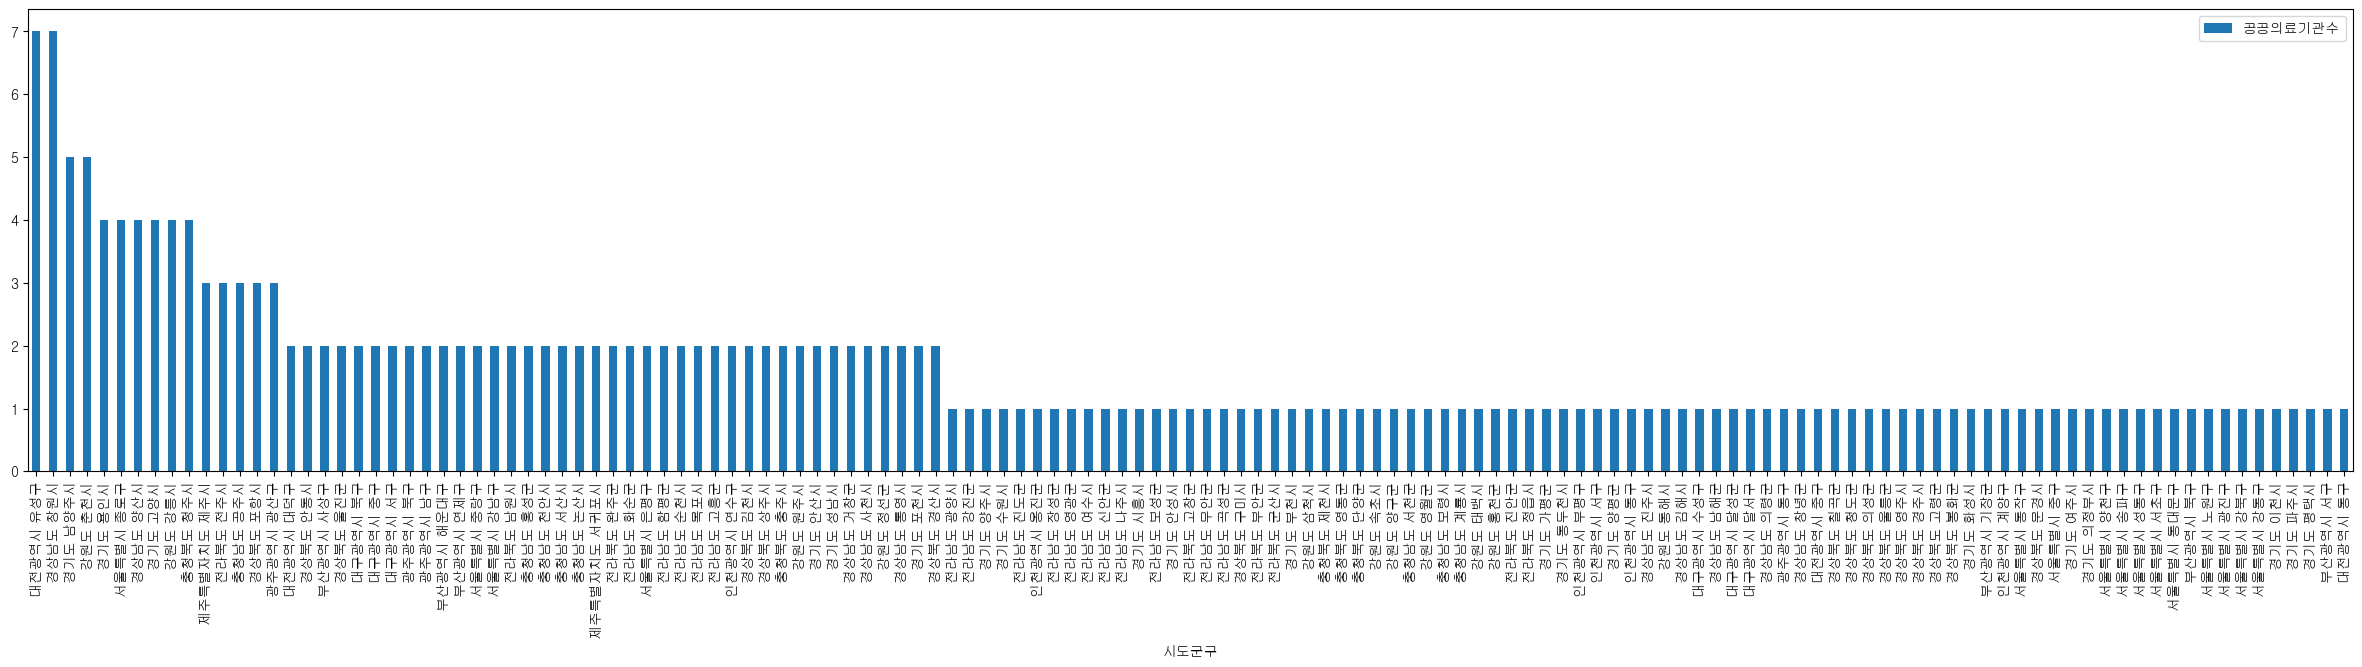

In [43]:
mc_ratio = local_medicalcenter_population[['공공의료기관수']]
mc_ratio = mc_ratio.sort_values(by = '공공의료기관수', ascending = False)
mc_ratio.plot(kind = 'bar', rot= 90, figsize = (30, 6))

- 공공의료 기관수가 많은 상위 10개 시도 출력

<Axes: xlabel='시도군구'>

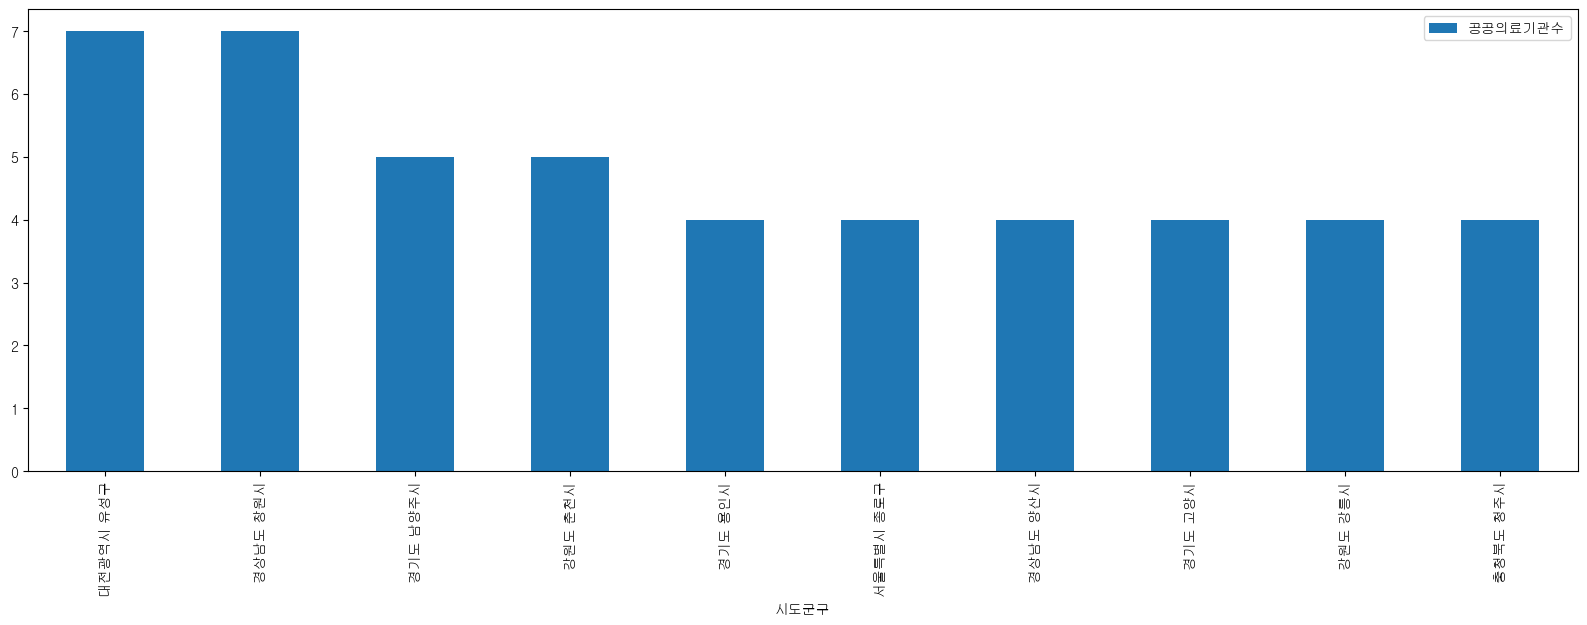

In [45]:
mc_ratio = mc_ratio.sort_values('공공의료기관수', ascending = False)
mc_ratio[:10].plot(kind = 'bar', rot = 90, figsize = (20, 6))

- 인구대비 공공의료기관 비율

<Axes: xlabel='시도군구'>

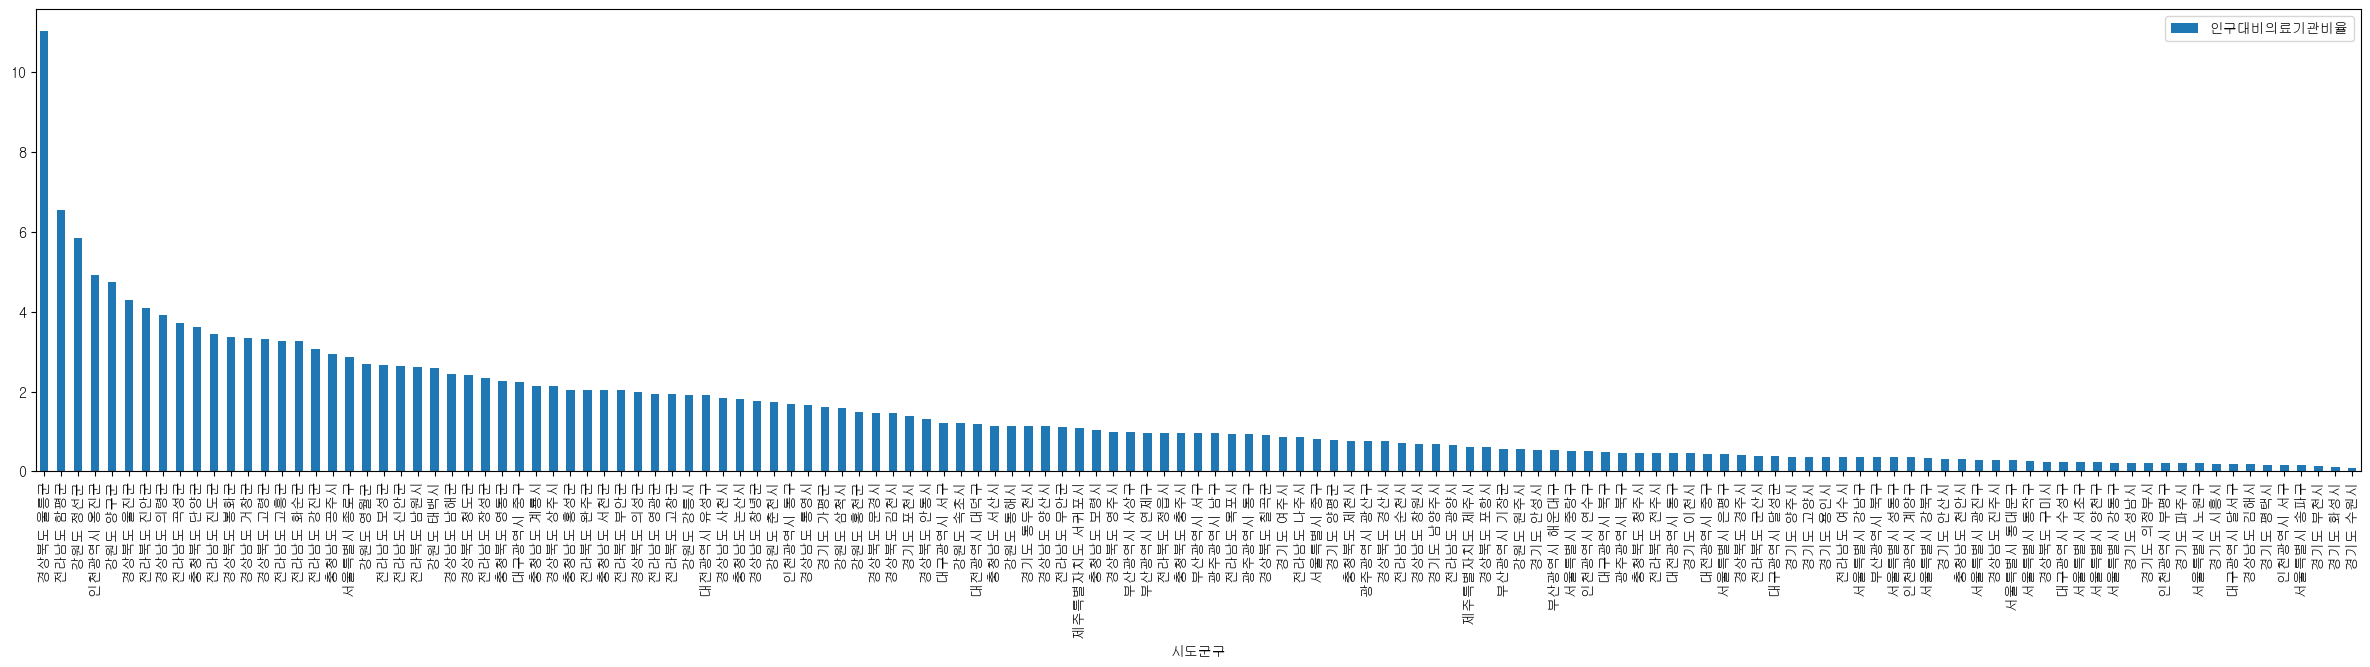

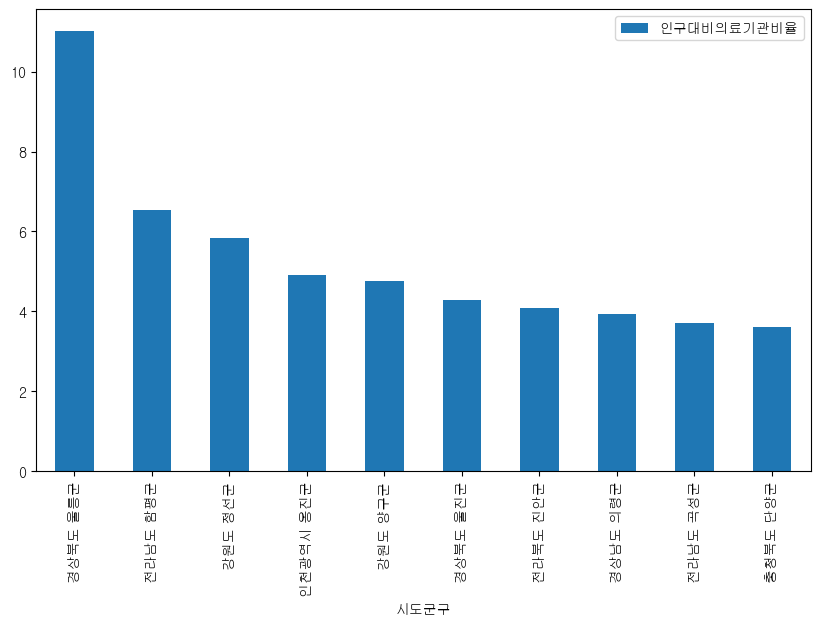

In [46]:
population_mc_rate = local_medicalcenter_population[['인구대비의료기관비율']]
population_mc_rate = population_mc_rate.sort_values('인구대비의료기관비율', ascending = False)
population_mc_rate.plot(kind = 'bar', rot = 90, figsize = (30, 6))
population_mc_rate[:10].plot(kind = 'bar', rot = 90, figsize = (10, 6))
